# Figure 4

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


# a) Developmental co-maturation

Maturational coupling matrix:

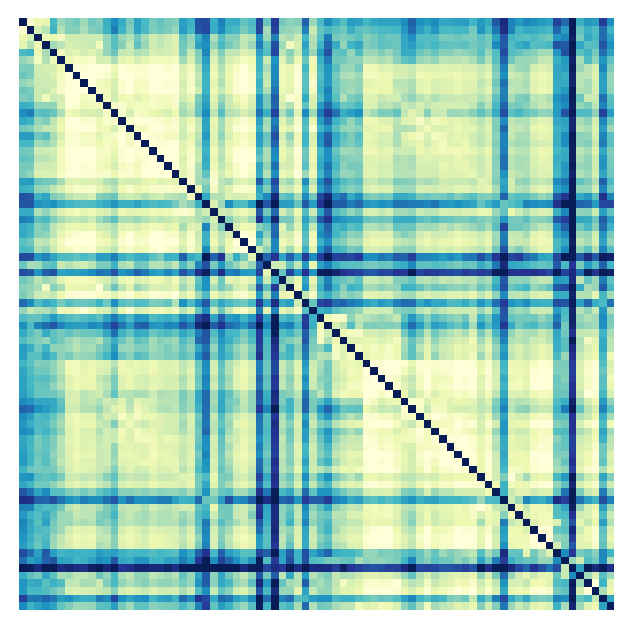

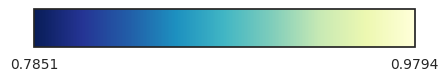

In [6]:
mcm = matrices.MaturationalCouplingMatrix()
mcm.plot()

Correlation of LTC with MCM:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-aal_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Maturational coupling
Coef: 0.0969809339684603; p-value (spin): 0.0


(0.0969809339684603, 0.0)

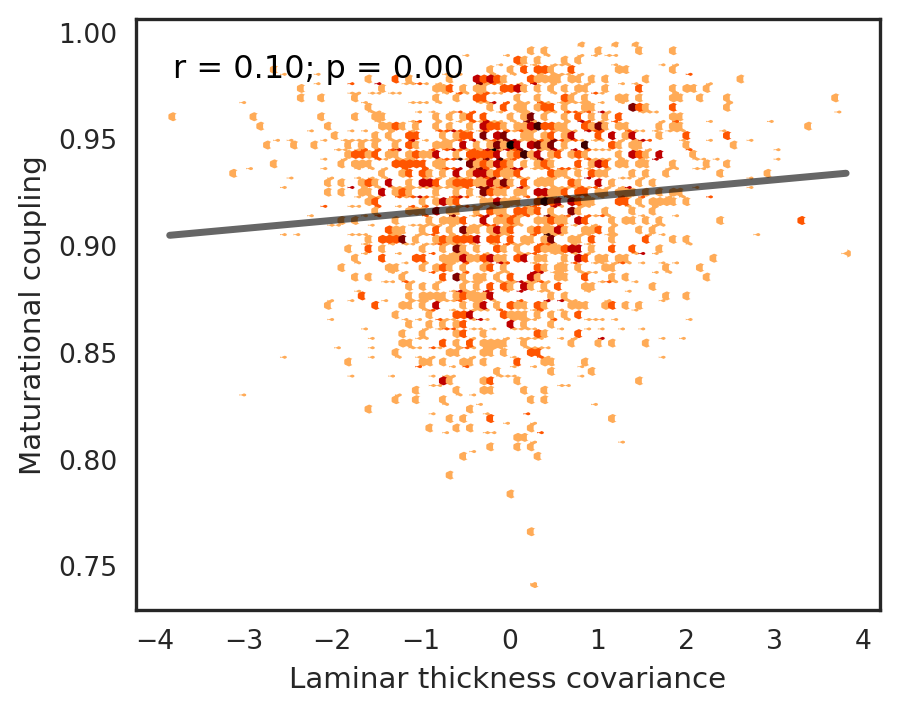

In [4]:
ltc_aal = matrices.MicrostructuralCovarianceMatrix('thickness', 'aal')
ltc_aal.correlate_edge_wise(mcm, axis_off=False, figsize=(5,4))

# b) Developmental enrichment of genes associated with LTC G1

In [9]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400'))
top_genes, pls = ltcg.ahba_pls(['LTC G1'])

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


0 of 267 genes do not exist


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


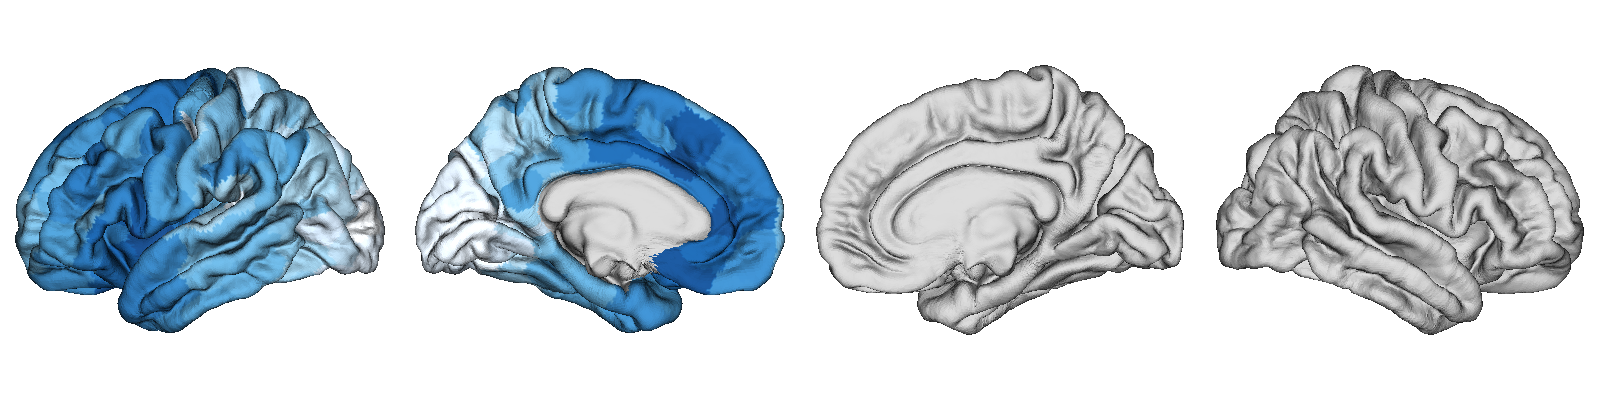

In [10]:
helpers.plot_surface(
    helpers.deparcellate(datasets.fetch_aggregate_gene_expression(top_genes[0]['pos'], 'schaefer400', ibf_threshold=0.5), 'schaefer400', space='fsaverage'),
    inflate=False, cmap='Blues', plot_downsampled=False, space='fsaverage'
)

/home/asaberi/laminar_organization/code/figures/../helpers.py:996: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(stages_order, rotation=90);


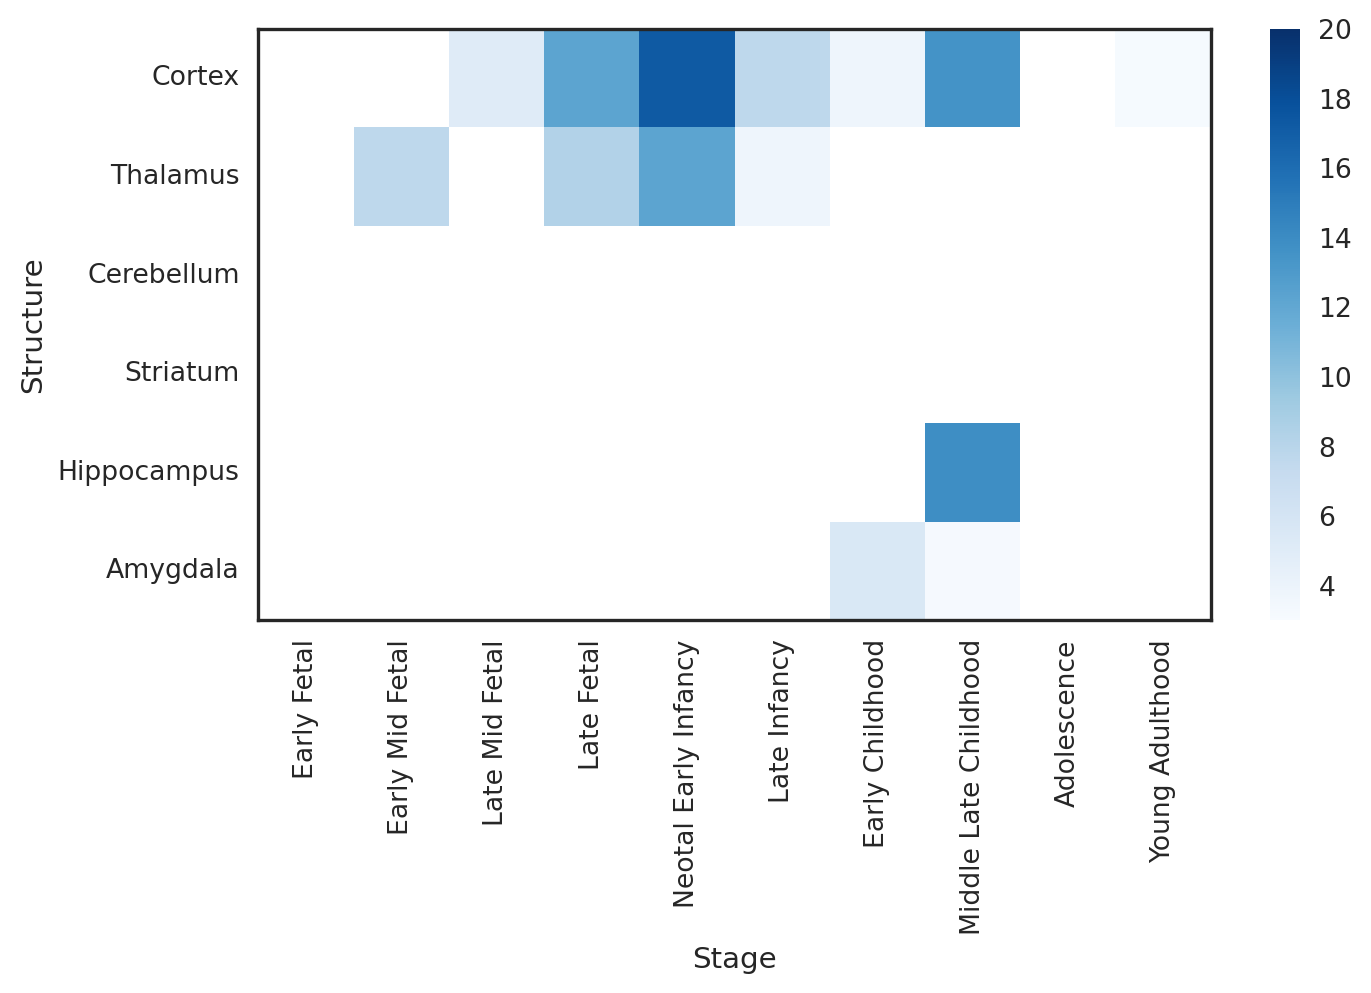

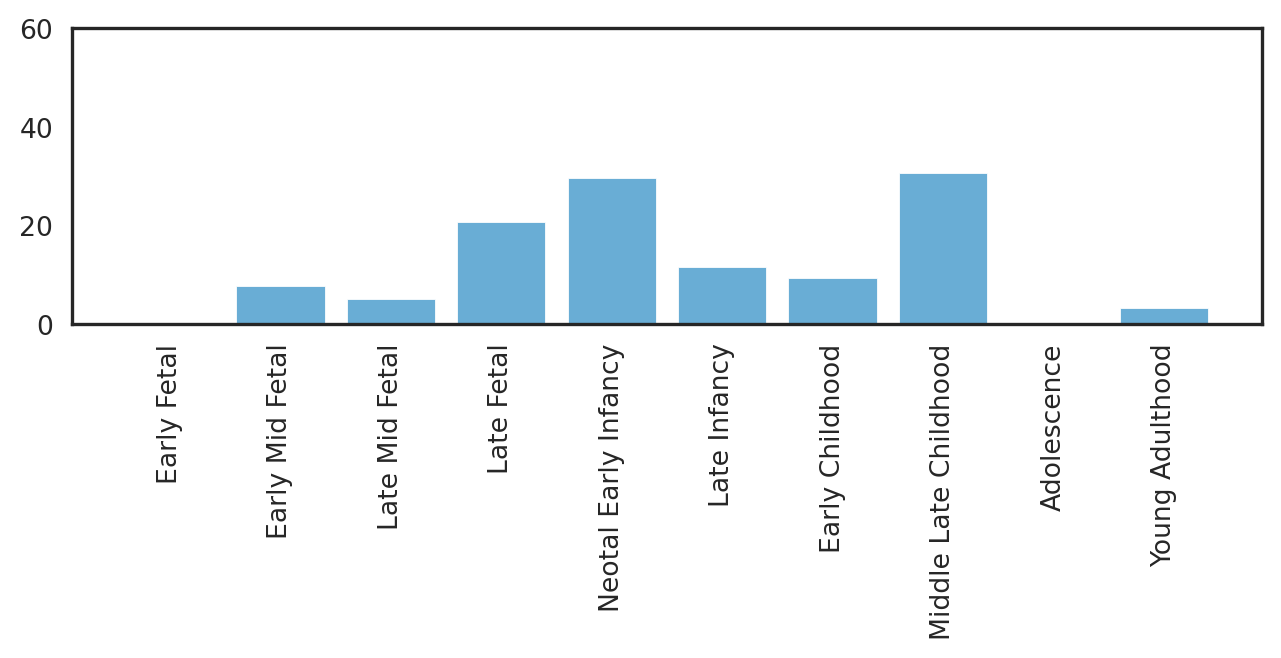

In [11]:
_ = helpers.run_csea_developmental(top_genes[0]['pos'], color='#69add5', cmap='Blues')

0 of 233 genes do not exist


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


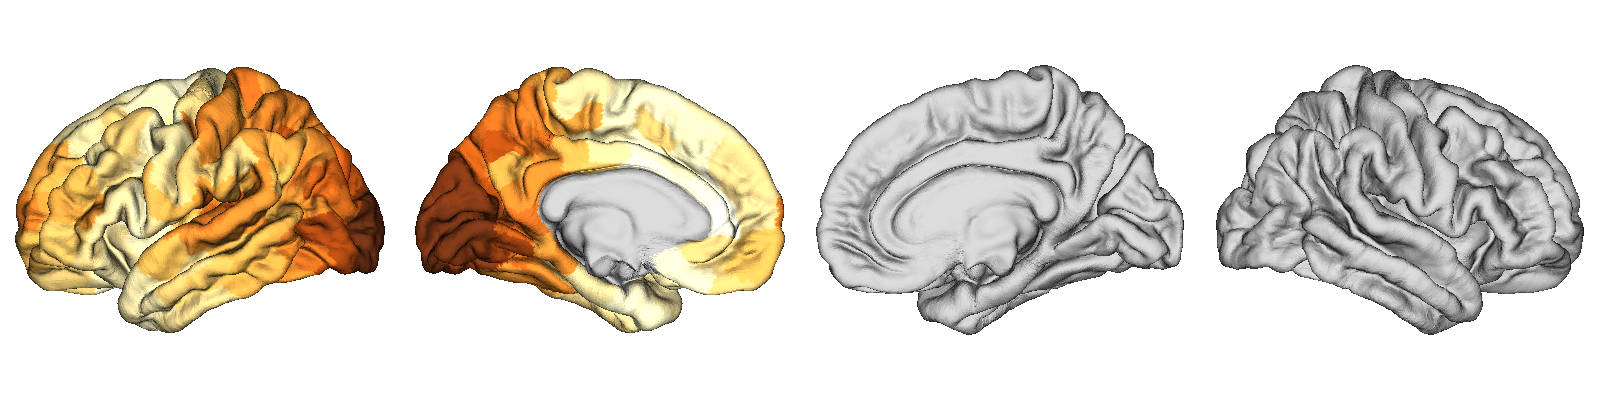

In [12]:
helpers.plot_surface(
    helpers.deparcellate(datasets.fetch_aggregate_gene_expression(top_genes[0]['neg'], 'schaefer400', ibf_threshold=0.5), 'schaefer400', space='fsaverage'),
    inflate=False, cmap='YlOrBr', plot_downsampled=False, space='fsaverage'
)

/home/asaberi/laminar_organization/code/figures/../helpers.py:996: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(stages_order, rotation=90);


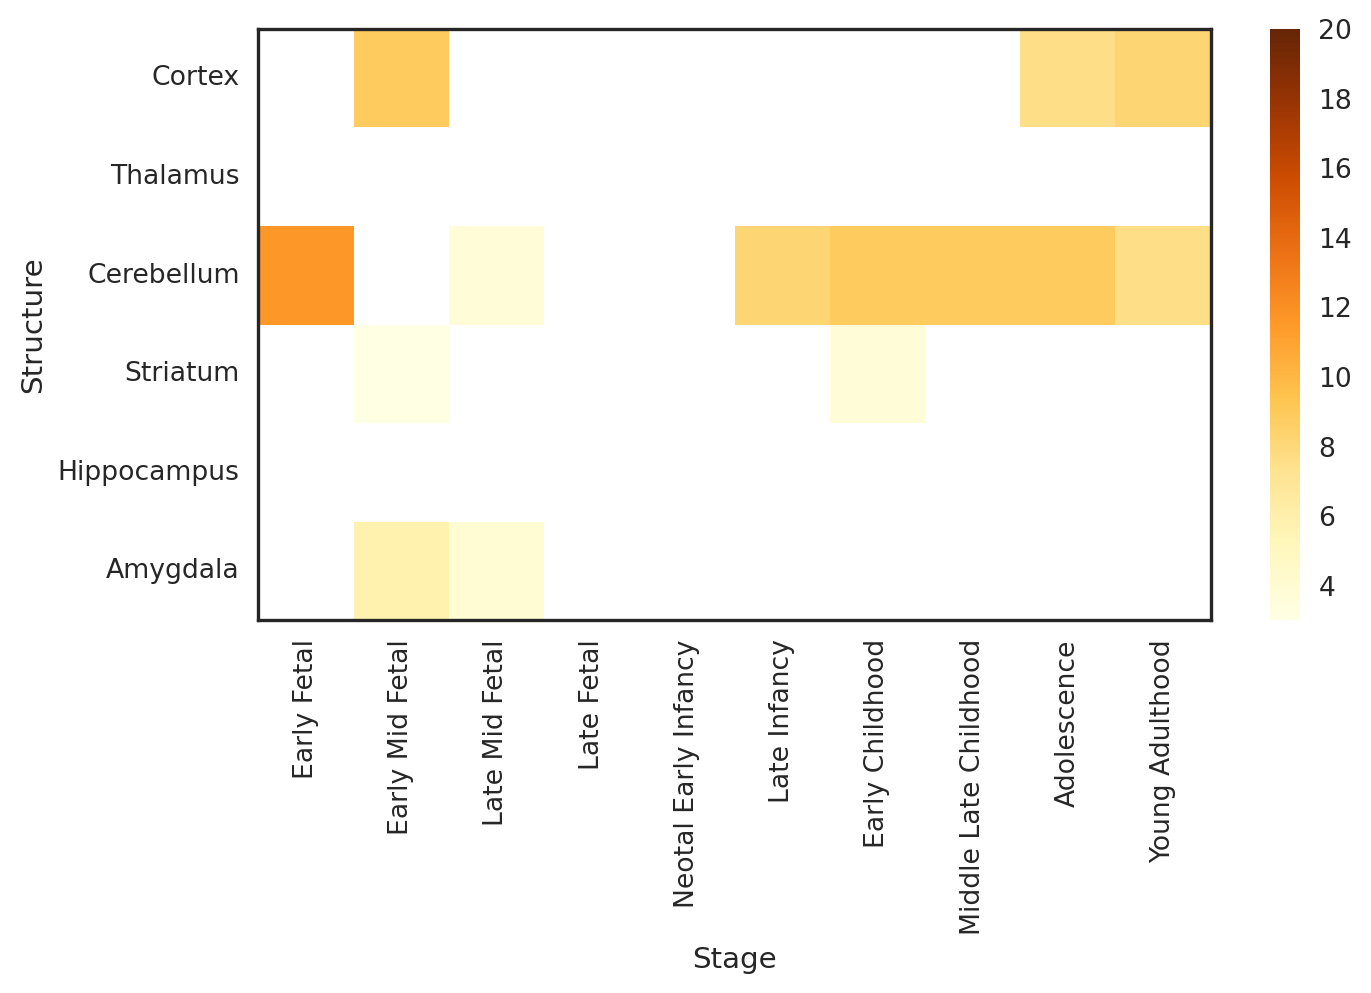

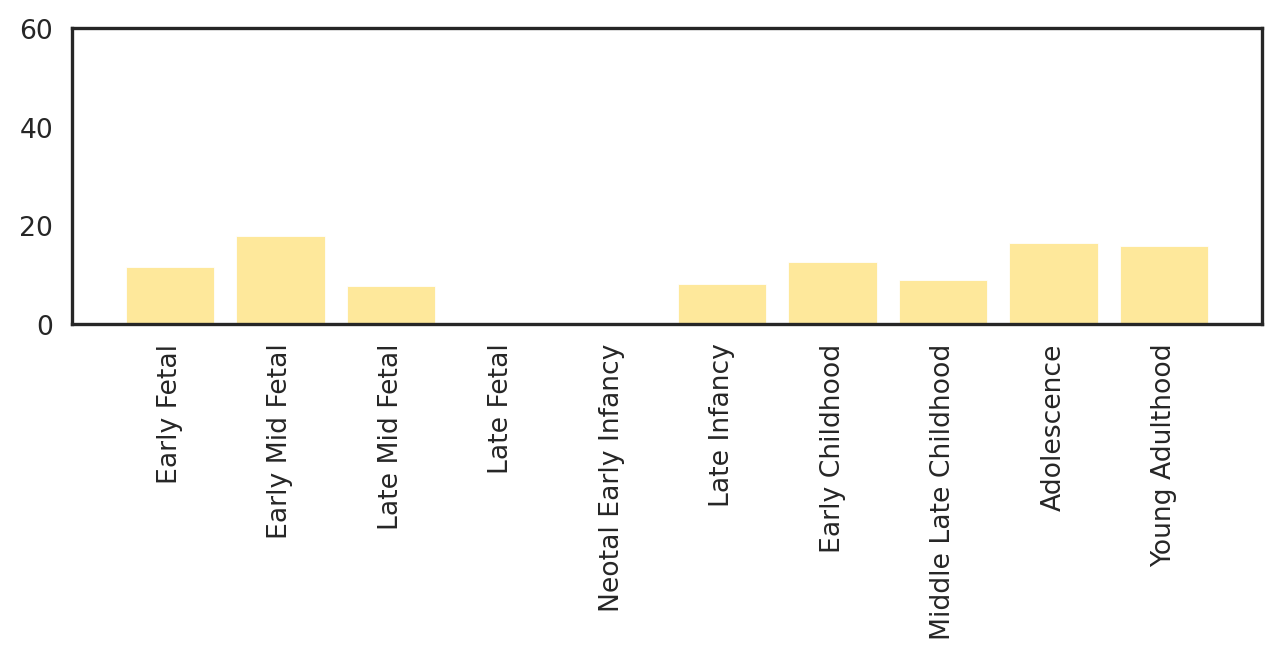

In [13]:
_ = helpers.run_csea_developmental(top_genes[0]['neg'], color='#fee89b', cmap='YlOrBr')